### Divisão de conjuntos Treino e Teste, qual a importância e o impacto na modelagem?

- Na aula passada houve uma regressão polinomial (estudar) (avaliar o melhor grau de polinômio para avaliação do resultado do modelo)
- Metrica para estimar o grau do polinomio (EQM - erro quadrático médio) -> O EQM sendo testado o mesmo conjunto de treino é otimista (é equivocado, pois ele diz que quanto maior o polinomio melhor o EQM, mas não é assim que funciona, para evitar overfitting.)
- Evitar aumentar demais a complexidade do modelo para evitar overfitting.

- Luis Torgno - Livro de R

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
def gerar_dados(n=1000):
    x = np.random.uniform(low=8, high=18, size=n)
    
    # regressão
    y = 45 * np.tanh(x / 1.7 - 7) + 57 + np.random.normal(loc=0, scale=1, size=n)
    
    return pd.DataFrame({'x': x, 'y': y})

dados = gerar_dados(1000)
dados.head()

,x,y
0,16.375365,101.479288
1,14.548077,97.516267
2,8.136852,13.590593
3,11.520872,46.530559
4,14.941702,100.523121


In [84]:
def polinomios(df, grau):
    poly = PolynomialFeatures(degree=grau, include_bias=False)
    X_poly = poly.fit_transform(df[['x']])

    modelo = LinearRegression()
    modelo.fit(X_poly, df['y'])

    df['pred'] = modelo.predict(X_poly)
    return df

In [85]:
grau = 2 
dados_com_pred = polinomios(dados, grau)

In [86]:
dados_com_pred.head()

,x,y,pred
0,15.937846,101.651765,100.746026
1,9.393094,16.918555,19.343160
2,16.203559,101.013911,102.113697
3,12.847377,79.241336,73.735283
4,8.094670,13.827451,-7.708382


In [87]:
eqm = np.zeros(50)

In [88]:
for i in range(1, 51):
    df_poli = polinomios(dados, grau=i)
    eqm[i-1] = np.mean((df_poli['y'] - df_poli['pred']) ** 2)

melhor_grau = np.argmin(eqm) + 1
print(f"Melhor grau: {melhor_grau}")

Melhor grau: 15


In [89]:
#mesmo código de cima em programação funcional
# Função para calcular o EQM para um dado grau
def calcular_eqm(grau):
    df_poli = polinomios(dados, grau=grau)
    return np.mean((df_poli['y'] - df_poli['pred']) ** 2)

# Usar map para aplicar a função a cada grau de 1 a 100
graus = range(1, 101)
eqm_func= list(map(lambda grau: calcular_eqm(grau), graus))


melhor_grau_purrr = np.argmin(eqm_func) + 1
print(f"Melhor grau (funcional): {melhor_grau_purrr}")

Melhor grau (funcional): 15


In [90]:
df_1 = polinomios(gerar_dados(1000), grau = 1)
df_4 = polinomios(gerar_dados(1000), grau = 4)
df_50 = polinomios(gerar_dados(1000), grau = 50)

In [91]:
# Simulação de Monte Carlo
monte_carlo_results = []
for _ in range(50):
    df_1 = polinomios(gerar_dados(10), grau=1)
    df_4 = polinomios(gerar_dados(10), grau=4)
    df_50 = polinomios(gerar_dados(10), grau=50)
    monte_carlo_results.append(pd.DataFrame({
        'grau': np.concatenate([np.ones(10), np.ones(10) * 4, np.ones(10) * 50]),
        'x': np.concatenate([df_1['x'], df_4['x'], df_50['x']]),
        'y': np.concatenate([df_1['y'], df_4['y'], df_50['y']]),
        'pred': np.concatenate([df_1['pred'], df_4['pred'], df_50['pred']])
    }))

df_purrr_monte_carlo = pd.concat(monte_carlo_results)

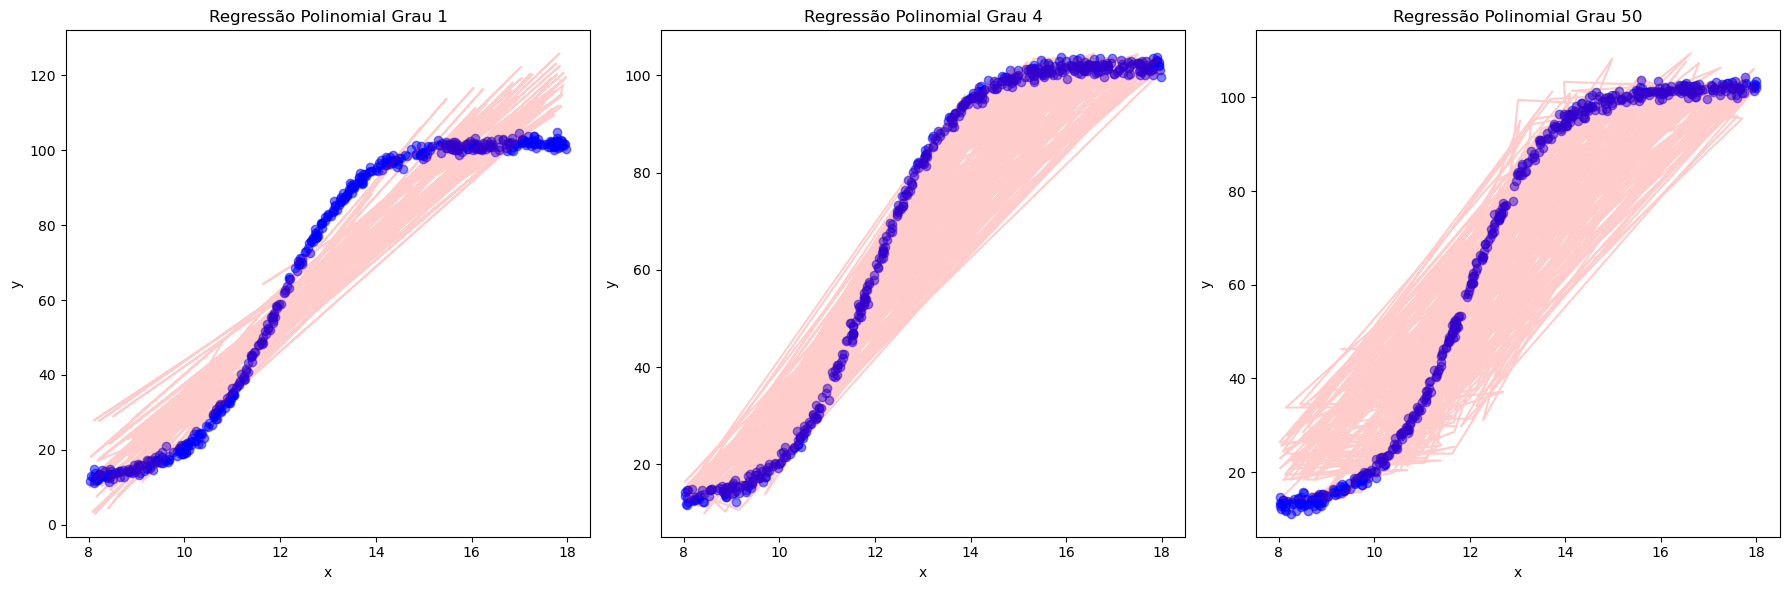

In [92]:
# Configurar o tamanho da figura
plt.figure(figsize=(18, 6))

# Plot para grau 1
plt.subplot(1, 3, 1)
for i in range(50):
    subset = df_purrr_monte_carlo[(df_purrr_monte_carlo['grau'] == 1) & (df_purrr_monte_carlo.index // 10 == i)]
    plt.plot(subset['x'], subset['pred'], color='red', alpha=0.2)
plt.scatter(df_purrr_monte_carlo[df_purrr_monte_carlo['grau'] == 1]['x'], 
            df_purrr_monte_carlo[df_purrr_monte_carlo['grau'] == 1]['y'], 
            color='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Polinomial Grau 1')

# Plot para grau 4
plt.subplot(1, 3, 2)
for i in range(50):
    subset = df_purrr_monte_carlo[(df_purrr_monte_carlo['grau'] == 4) & (df_purrr_monte_carlo.index // 10 == i)]
    plt.plot(subset['x'], subset['pred'], color='red', alpha=0.2)
plt.scatter(df_purrr_monte_carlo[df_purrr_monte_carlo['grau'] == 4]['x'], 
            df_purrr_monte_carlo[df_purrr_monte_carlo['grau'] == 4]['y'], 
            color='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Polinomial Grau 4')

# Plot para grau 50
plt.subplot(1, 3, 3)
for i in range(50):
    subset = df_purrr_monte_carlo[(df_purrr_monte_carlo['grau'] == 50) & (df_purrr_monte_carlo.index // 10 == i)]
    plt.plot(subset['x'], subset['pred'], color='red', alpha=0.2)
plt.scatter(df_purrr_monte_carlo[df_purrr_monte_carlo['grau'] == 50]['x'], 
            df_purrr_monte_carlo[df_purrr_monte_carlo['grau'] == 50]['y'], 
            color='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Polinomial Grau 50')

# Mostrar os plots
plt.tight_layout()
plt.show()


----
Parte 2, dessa vez, ao invés de testar o EQM nos mesmos dados de treino, irei gerar novos dados e partir um grupo de treino e testes

In [4]:
novos_dados = gerar_dados(1000)
novos_dados.head()

,x,y
0,15.874255,101.521380
1,15.701764,102.390729
2,11.290811,42.321950
3,17.263826,101.668752
4,12.568024,74.456105


In [5]:
def polinomios2(df, grau):
    poly = PolynomialFeatures(degree=grau, include_bias=False)
    X_poly = poly.fit_transform(df[['x']])

    modelo = LinearRegression()
    modelo.fit(X_poly, df['y'])

    df['pred'] = modelo.predict(X_poly)
    return df

In [ ]:
def calcular_eqm(df_treino, df_teste, grau):
    poly = PolynomialFeatures(degree=grau, include_bias=False)
    X_treino_poly = poly.fit_transform(df_treino[['x']])
    X_teste_poly = poly.transform(df_teste[['x']])
    
    modelo = LinearRegression()
    modelo.fit(X_treino_poly, df_treino['y'])
    
    y_pred = modelo.predict(X_teste_poly)
    return np.mean((df_teste['y'] - y_pred) ** 2)